In [36]:
import os
import sys
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cmocean.cm as ocm

proj_dir = '/home/ubuntu/bigStick/antarctic_melting'
data_dir = os.path.join(proj_dir,'data','analysis')
fig_dir = os.path.join(proj_dir,'reports','tidal_melting','figures')

In [156]:
def plot_m(ax,da,text,vmin=None,vmax=None):
    total = da.sum()
    da = da *10000
    cmap = ocm.balance
    cmap.set_bad(color='lightgray')
    if vmin == None:
        da.plot(ax=ax,vmin=-da.std()*2,vmax=da.std()*2,cmap=cmap,
                cbar_kwargs={'label': 'u*T* in $10^{-4}$ m/s*degC'})
    else:
        da.plot(ax=ax,vmin=vmin,vmax=vmax,cmap=cmap,
                cbar_kwargs={'label': 'u*T* in $10^{-4}$ m/s*degC'})
    
    #ax = make_text(ax,f'{text}  (sum: {total.values:.2f})')
    ax.set_title(f'{text}  (sum: {total.values:.2f})')
    
    return ax

def make_text(ax,text):
    ax.text(0.1, 0.9, text, horizontalalignment='center',verticalalignment='center',
                   transform=ax.transAxes,size=14)
    return ax

def plot_decomp(decomp,vmin=None,vmax=None):
    fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(8,8))
    ax1,ax2,ax3,ax4 = axes.flatten()

    ax1 = plot_m(ax1,decomp.dMstar,'dMstar',vmin,vmax)
    ax2 = plot_m(ax2,decomp.therm,'dTherm',vmin,vmax)
    ax3 = plot_m(ax3,decomp.dyn,'dDyn',vmin,vmax)
    ax4 = plot_m(ax4,decomp.cov,'dCov',vmin,vmax)

    for ax in axes.flatten():
        ax.set_aspect('equal')
        ax.axis('off')
        ax.set_facecolor('gray')
    plt.tight_layout()
    plt.show()

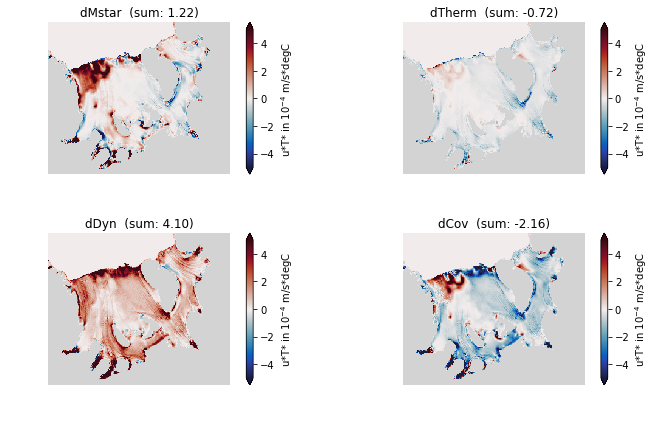

In [108]:
decompPath = os.path.join(data_dir,'processed','dynThermDecomp_test.nc')
decomp = xr.open_dataset(decompPath)
plot_decomp(decomp,-5,5)

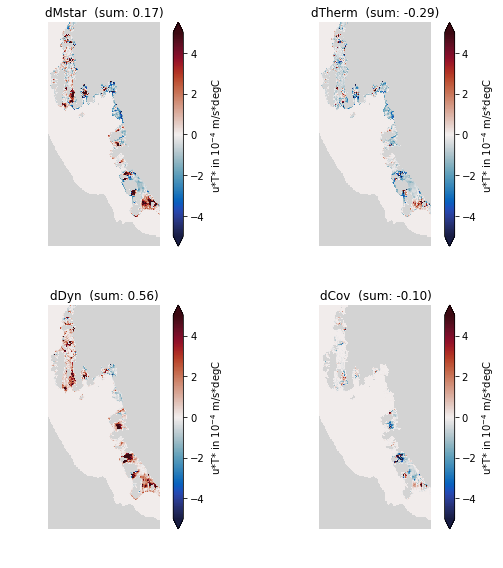

In [157]:
decompPath = os.path.join(data_dir,'processed','dynThermDecomp_AB.nc')
decomp = xr.open_dataset(decompPath)
plot_decomp(decomp,-5,5)

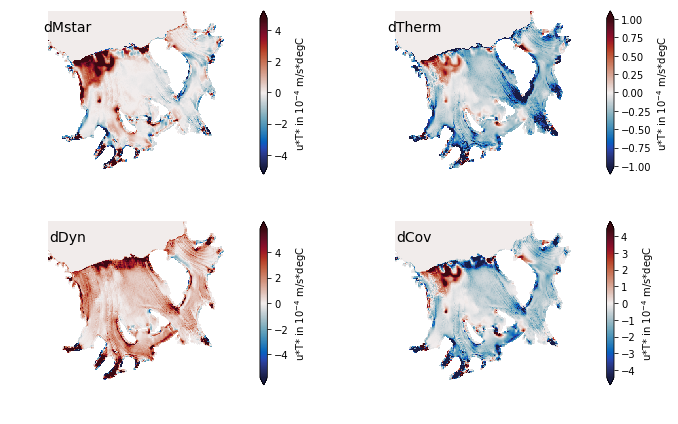

In [63]:
fig,axes = plt.subplots(ncols=2,nrows=2,figsize=(10,6))
ax1,ax2,ax3,ax4 = axes.flatten()

ax1 = plot_m(ax1,decomp.dMstar,'dMstar')
ax2 = plot_m(ax2,decomp.therm,'dTherm')
ax3 = plot_m(ax3,decomp.dyn,'dDyn')
ax4 = plot_m(ax4,decomp.cov,'dCov')

for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
fig,axes = plt.subplots(ncols=3,nrows=2,figsize=(16,8))
ax1,ax2,ax3,ax4,ax5,ax6 = axes.flatten()

ax1 = plot_m(ax1,dMstar,'dMstar')
ax2 = plot_m(ax2,dsum,'therm+dyn+cov')
ax3 = plot_m(ax3,therm,'therm')
ax4 = plot_m(ax4,dyn,'dyn')
ax5 = plot_m(ax5,cov,'cov')

for ax in axes.flatten():
    ax.set_aspect('equal')
    ax.axis('off')
plt.tight_layout()
plt.show()